In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 256
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador256 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion.csv',
                            canasta='canasta_basica.csv')

recomendador256.CargarModelo(emb_size=256, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
No se encontró el modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-256_CNN.h5
Puedes crear uno nuevo con el método EntrenarModelo()



In [5]:
recomendador256.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=1, max_unidades=11,
                                                  numero_recetas=1)

Generando 1  recetas aleatorias...



100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


array([['4 piezas de cordero  frito  cocinado  cerebro  carnes de variedades y subproductos, 10 piezas de keebler  suave  galleta de pasas de avena  tesoros de panaderos, 9 gramos de ternera  cruda  separable solamente  hueso  frente  vástago  australiano, 10 cucharadas de ternera  frita  cocinada  hígado  carnes de variedades y subproductos, 3 gramos de frijoles  sólidos drenados  paquete regular  enlatado  verde  chasquido, 5 tazas de suero  fluido  dulce',
        '5304.28', '691.19', '130.78', '228.45']], dtype='<U452')


ITERACIÓN: 1
min unidades: 1  max unidades: 11
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/10000_recetas_random_EMBED-256_DATA_X.npy no existe o está corrupto.
datasets/numpy/10000_recetas_random_EMBED-256_DATA_Y.npy no existe o está corrupto.
Generando 10000  recetas aleatorias...



100%|██████████| 10000/10000 [00:14<00:00, 672.02it/s]


Calculando vector de características de 10000 recetas...


100%|██████████| 10000/10000 [9:00:25<00:00,  3.24s/it] 


Error al cargar archivos NumPy.
datasets/numpy/9_TEST_EMBED-256_DATA_X.npy no existe o está corrupto.
datasets/numpy/9_TEST_EMBED-256_DATA_Y.npy no existe o está corrupto.
Procesando dataset de testing...
Procesando recetas_test.csv


100%|██████████| 9/9 [00:00<00:00, 1002.70it/s]


Calculando vector de características de 9 recetas...


100%|██████████| 9/9 [00:27<00:00,  3.06s/it]


Error al cargar archivos NumPy.
datasets/numpy/7_VAL_EMBED-256_DATA_X.npy no existe o está corrupto.
datasets/numpy/7_VAL_EMBED-256_DATA_Y.npy no existe o está corrupto.
Procesando dataset de validación...
Procesando recetas_val.csv


100%|██████████| 7/7 [00:00<00:00, 7013.89it/s]


Calculando vector de características de 7 recetas...


100%|██████████| 7/7 [00:23<00:00,  3.36s/it]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 196608)]          0         
                                                                 
 RESHAPING (Reshape)         (None, 256, 768)          0         
                                                                 
 batch_normalization (BatchN  (None, 256, 768)         3072      
 ormalization)                                                   
                                                                 
 CONV_1 (Conv1D)             (None, 252, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 251, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 249, 256)          393472    
                                                  

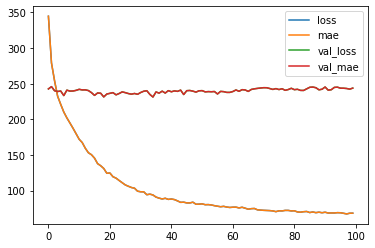

1/1 [==============================] - 0s 227ms/step - loss: 210.6573 - mae: 210.6573
[210.65725708007812, 210.65725708007812]
1/1 [==============================] - 3s 3s/step
receta 0 kcal_true: 324.0 kcal_pred: 56.01881  precisión: 17.3 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 12.528038  precisión: 16.5 %
receta 0 protein_true: 8.0 protein_pred: 1.5622847  precisión: 19.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 0.47094882  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 54.643818  precisión: 12.5 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 8.7157135  precisión: 9.1 %
receta 1 protein_true: 8.0 protein_pred: 1.6889826  precisión: 21.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 1.5595417  precisión: 39.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 58.25929  precisión: 6.9 %
receta 2 carbohydrate_true:

In [6]:
recomendador256.NUM_RECETAS = 10000
recomendador256.EMB_SIZE = 256
BATCHSIZE = 32
ITER = 1
INITIAL_EPOCH = 0
EPOCHS = recomendador256.NUM_RECETAS // BATCHSIZE
LR = 1e-5

Histories = []
for iteracion in range(ITER):
  MINU = 1 
  MAXU = 11   
  print('\nITERACIÓN:', iteracion+1)
  print('min unidades:',MINU, ' max unidades:', MAXU)
  print('Entrenando desde epoch', INITIAL_EPOCH)
  print('------------------------------------------\n')
  modelo256, history = recomendador256.EntrenarModelo(df_nutricionales='nutricion.csv',
                                #df_training='recipes_con_info_nutricional.csv',
                                df_test='recetas_test.csv', 
                                df_val='recetas_val.csv',
                                learning_rate=LR,
                                version=version, 
                                initial_epoch = INITIAL_EPOCH,                             
                                epochs=INITIAL_EPOCH + EPOCHS,
                                batch_size=BATCHSIZE, 
                                kernels=128,                                             
                                min_ingredientes=5, max_ingredientes=11,
                                min_unidades=MINU, max_unidades=MAXU,                               
                                save=True, verbose=True)
  INITIAL_EPOCH = history.epoch[-1]

  Histories.append(history)


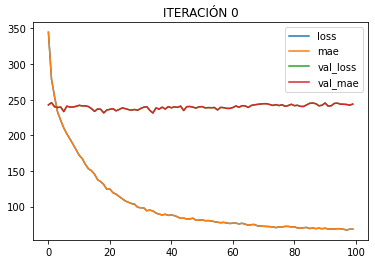

LOSS: 68.32029724121094  -- MAE: 68.32029724121094  -- VAL_LOSS: 243.8441619873047  -- VAL_MAE: 243.8441619873047
----------------------------------------------------------


In [7]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')

Cargado dataset de entrenamiento: datasets/recipes_con_info_nutricional.csv
1090 recetas encontradas.
Calculando vector de características de 1090 recetas...


100%|██████████| 1090/1090 [1:18:38<00:00,  4.33s/it] 


datasets/numpy/9_TEST_EMBED-256_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-256_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-256_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-256_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 196608)]          0         
                                                                 
 RESHAPING (Reshape)         (None, 256, 768)          0         
                                                                 
 batch_normalization_1 (Batc  (None, 256, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 252, 512)          1966592   
                                                                 
 P

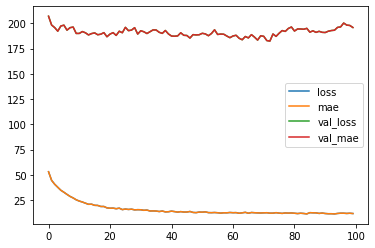

1/1 [==============================] - 0s 268ms/step - loss: 170.7054 - mae: 170.7054
[170.7053985595703, 170.7053985595703]
1/1 [==============================] - 0s 173ms/step
receta 0 kcal_true: 324.0 kcal_pred: 228.91176  precisión: 70.7 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 31.371492  precisión: 41.3 %
receta 0 protein_true: 8.0 protein_pred: 4.176231  precisión: 52.2 %
receta 0 total_fat_true: 0.0 total_fat_pred: 8.873208  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 187.18948  precisión: 42.9 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 22.673794  precisión: 23.6 %
receta 1 protein_true: 8.0 protein_pred: 2.4057608  precisión: 30.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 9.098569  precisión: 44.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 256.80087  precisión: 30.4 %
receta 2 carbohydrate_true

In [8]:
modelo256, history2 = recomendador256.EntrenarModelo(df_nutricionales='nutricion.csv',
                            df_training='recipes_con_info_nutricional.csv',
                            df_test='recetas_test.csv', 
                            df_val='recetas_val.csv',
                            learning_rate=1e-4,
                            version=version, 
                            initial_epoch = INITIAL_EPOCH,                             
                            epochs=INITIAL_EPOCH + EPOCHS, 
                            kernels=128,                                             
                            min_ingredientes=5, max_ingredientes=11,
                            min_unidades=MINU, max_unidades=MAXU,                               
                            save=True, verbose=True)

Histories.append(history)

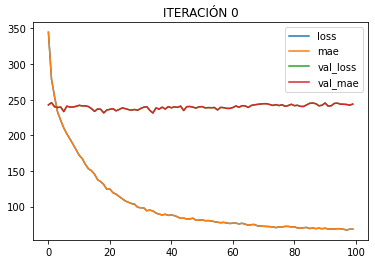

LOSS: 68.32029724121094  -- MAE: 68.32029724121094  -- VAL_LOSS: 243.8441619873047  -- VAL_MAE: 243.8441619873047
----------------------------------------------------------


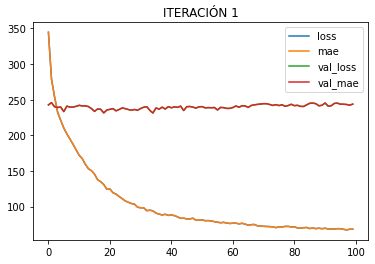

LOSS: 68.32029724121094  -- MAE: 68.32029724121094  -- VAL_LOSS: 243.8441619873047  -- VAL_MAE: 243.8441619873047
----------------------------------------------------------


In [9]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')